In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
df_ads = pd.read_csv('Social_Network_Ads.csv')
print(df_ads.head())
print("Ukuran data : ", df_ads.shape)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Ukuran data :  (400, 5)


In [5]:
# menampilkan ringkasan singkat data
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# menampilkan statistik data
df_ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# Menentukan fitur(X) dan kelas(Y)
# Fitur yang digunakan adalah atribut Age dan EstimatedSalary

X = df_ads.iloc[:, [2,3]]
y = df_ads.iloc[:, 4]

print(X)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [8]:
# Membagi dataset menjadi data latih dan data uji, 75%(300 data) dari dataset sebagai data latih
# dan 25% (100 data) sebagai data uji.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25, 
                                                    random_state=0)

print("Jumlah data latih : {} data".format(X_train.shape[0]))
print("Jumlah data uji : {} data".format(X_test.shape[0]))

Jumlah data latih : 300 data
Jumlah data uji : 100 data


In [9]:
# Normalisasi dengan Z Score agar distribusi menjadi normal (Gaussian Distribution)
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# mencetak data yang telah dinormalisasi
print(X_train_norm[0:5])
print(X_test_norm[0:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [10]:
# Membuat model dengan gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train_norm, y_train)

GaussianNB()

In [11]:
# Prediksi data uji
y_pred = clf.predict(X_test_norm)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [12]:
# Menampilkan hasil prediksi data uji
data_hasil_prediksi = pd.DataFrame(X_test, columns=['Age','EstimatedSalary'])
data_hasil_prediksi = pd.concat([data_hasil_prediksi, pd.Series(y_test, name='Purchased')], axis=1)

data_hasil_prediksi['Purchased_Pred'] = y_pred
data_hasil_prediksi.head(20)

,Age,EstimatedSalary,Purchased,Purchased_Pred
0,30,87000,0,0
1,38,50000,0,0
2,35,75000,0,0
3,30,79000,0,0
4,35,50000,0,0
5,27,20000,0,0
6,31,15000,0,0
7,36,144000,1,1
8,18,68000,0,0
9,47,43000,0,1


In [13]:
# Membuat Confusion Matrix untuk menghitung akurasi
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Jumlah data dengan label 0 dan hasil prediksi 0 :", cm[0,0])
print("Jumlah data dengan label 0 dan hasil prediksi 1 :", cm[0,1])
print("Jumlah data dengan label 1 dan hasil prediksi 1 :", cm[1,1])
print("Jumlah data dengan label 1 dan hasil prediksi 0 :", cm[1,0])

akurasi =((cm[0,0]+cm[1,1])/len(y_pred))*100
print("Akurasi : {} %".format(akurasi))

Jumlah data dengan label 0 dan hasil prediksi 0 : 65
Jumlah data dengan label 0 dan hasil prediksi 1 : 3
Jumlah data dengan label 1 dan hasil prediksi 1 : 25
Jumlah data dengan label 1 dan hasil prediksi 0 : 7
Akurasi : 90.0 %


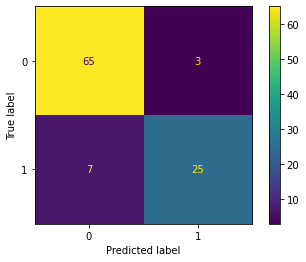

In [51]:
# Membuat diagram confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

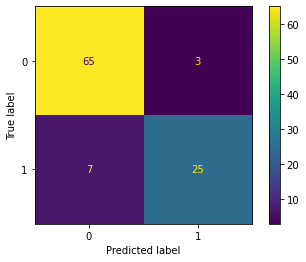

In [52]:
# Membuat diagram confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()